<a href="https://colab.research.google.com/github/RGilmartin/FDSFE_RGilmartin/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
# for plotting
import seaborn as sns
# np.polyfit
#sklearn
from sklearn.linear_model import LinearRegression

cities = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv", header=None,names=["population", "wspeed", "city"])
cities

,population,wspeed,city
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


<Axes: xlabel='population', ylabel='wspeed'>

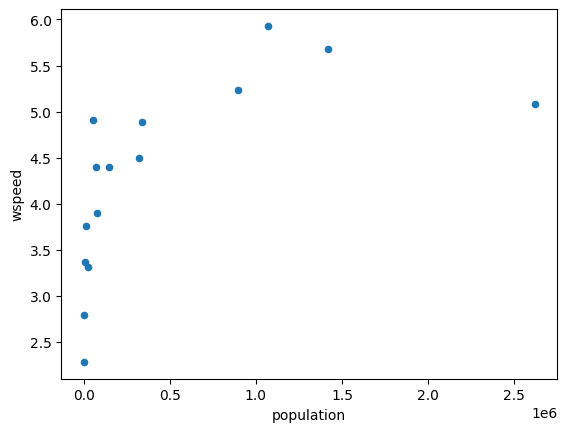

In [8]:
cities.plot("population", "wspeed", kind="scatter")

In [39]:
cities['logpopulation'] = np.log10(cities["population"])

Text(0, 0.5, 'walking speed (feet/s)')

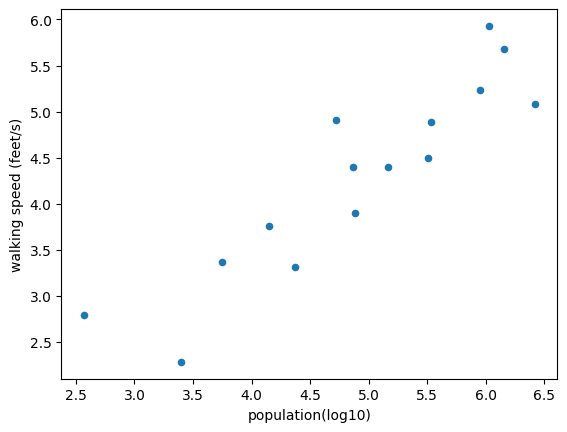

In [28]:
ax = cities.plot("logpopulation", "wspeed", kind="scatter")
ax.set_xlabel("population(log10)")
ax.set_ylabel("walking speed (feet/s)")

Text(0, 0.5, 'walking speed (feet/s)')

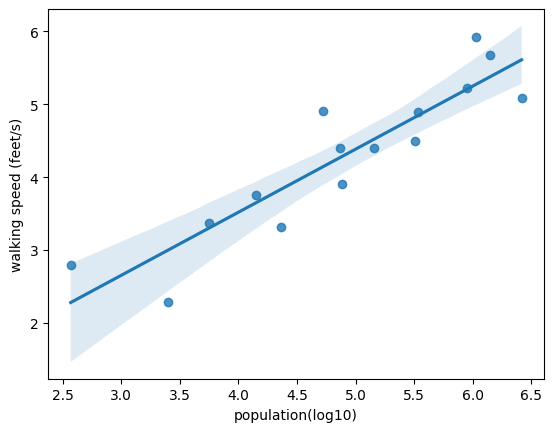

In [23]:
ax = sns.regplot(x = cities['logpopulation'], y=cities["wspeed"])
ax.set_xlabel("population(log10)")
ax.set_ylabel("walking speed (feet/s)")

In [25]:
def sumsqerror(y_true, y_predict):
  return((y_true - y_predict) ** 2).sum()

In [26]:
def line(slope, intercept, x):
  return slope*x+intercept

In [29]:
minnow = 1e7
for s in np.arange(0, 3, 0.01):
  for i in np.arange(0,2.5, 0.01):
    prd = line(s, i, cities["logpopulation"])
    sse = sumsqerror(cities['wspeed'], prd)
    if sse < minnow:
      minnow = sse
      slope_man, intercept_man = s, i
slope_man, intercept_man

(0.87, 0.03)

In [48]:
cities['prediction_manual'] = line(slope_man, intercept_man, cities['logpopulation'])

Text(0, 0.5, 'walking speed (feet/s)')

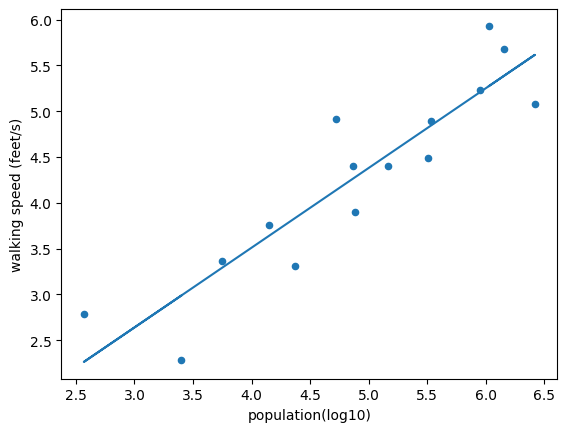

In [49]:
ax = cities.plot("logpopulation", "wspeed", kind="scatter")
ax.plot(cities['logpopulation'], cities['prediction_manual'], label="manual")
ax.set_xlabel("population(log10)")
ax.set_ylabel("walking speed (feet/s)")

In [50]:
cities['logpopulation'].values.reshape(-1, 1)

array([[3.40140054],
       [2.56820172],
       [3.75204845],
       [4.14921911],
       [4.36735592],
       [4.72098574],
       [4.86510397],
       [4.88705438],
       [5.161368  ],
       [5.50514998],
       [5.53275438],
       [5.95230801],
       [6.41830129],
       [6.15228834],
       [6.02938378]])

In [51]:
linreg = LinearRegression()
linreg.fit(cities['logpopulation'].values.reshape(-1,1), cities['wspeed'])
linreg.intercept_

0.05664889151453334

In [54]:
cities['sklearn_prediction'] = linreg.predict(cities['logpopulation'].values.reshape(-1,1))

Text(0, 0.5, 'walking speed (feet/s)')

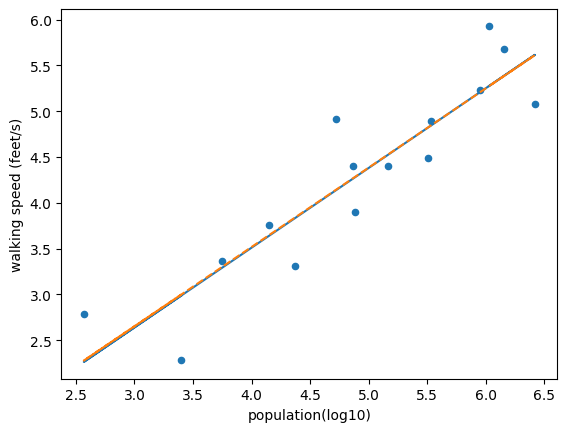

In [58]:
ax = cities.plot("logpopulation", "wspeed", kind="scatter")
ax.plot(cities['logpopulation'], cities['prediction_manual'],label="manual")
ax.plot(cities['logpopulation'], cities['sklearn_prediction'], '--',label="sklearn")
ax.set_xlabel("population(log10)")
ax.set_ylabel("walking speed (feet/s)")

In [59]:
linreg.score(cities["logpopulation"].values.reshape(-1,1), cities['wspeed'])

0.8216814457855732